In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
path = 'data/ex1data1.csv'
data = pd.read_csv(path, header=None, names=['Area', 'Price'])
data.head()

,Area,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [109]:
print(data.mean())
print(data.std())

Area       2000.680851
Price    340412.659574
dtype: float64
Area        794.702354
Price    125039.899586
dtype: float64


In [110]:
data = (data - data.mean()) / data.std()
data.head()

,Area,Price
0,0.130010,0.475747
1,-0.504190,-0.084074
2,0.502476,0.228626
3,-0.735723,-0.867025
4,1.257476,1.595389


In [111]:
data.describe()

,Area,Price
count,4.700000e+01,4.700000e+01
mean,1.889741e-17,-8.031401e-17
std,1.000000e+00,1.000000e+00
min,-1.445423e+00,-1.363666e+00
25%,-7.155897e-01,-7.238702e-01
50%,-1.417900e-01,-3.239979e-01
75%,3.376348e-01,3.521863e-01
max,3.117292e+00,2.874981e+00


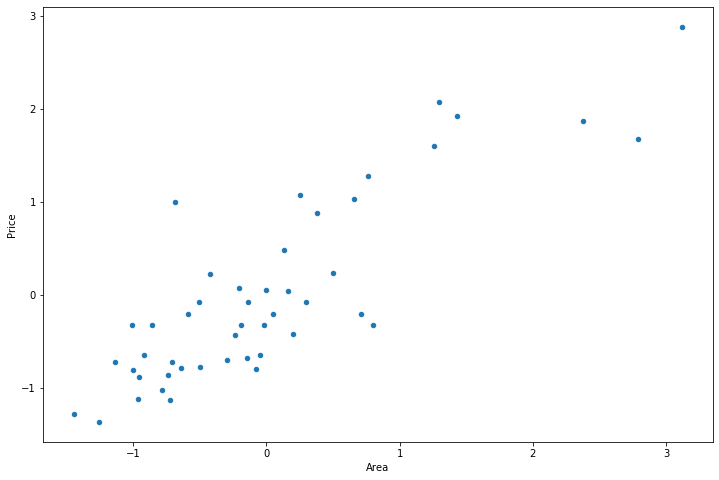

In [112]:
data.plot(kind='scatter', x='Area', y='Price', figsize=(12,8))

In [113]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [114]:
data.insert(0, 'Ones', 1)

In [115]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [116]:
X.head()

,Ones,Area
0,1,0.130010
1,1,-0.504190
2,1,0.502476
3,1,-0.735723
4,1,1.257476


In [117]:
y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  We also need to initialize theta.

In [118]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [119]:
theta

matrix([[0, 0]])

In [120]:
X.shape, theta.shape, y.shape

((47, 2), (1, 2), (47, 1))

In [121]:
computeCost(X, y, theta)

0.48936170212765967

In [122]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [123]:
alpha = 0.1
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-1.39722749e-16,  8.54987593e-01]])

In [124]:
computeCost(X, y, g)

0.13163644613963402

Text(0.5, 1.0, 'Predicted Price vs. Area(Sq.ft)')

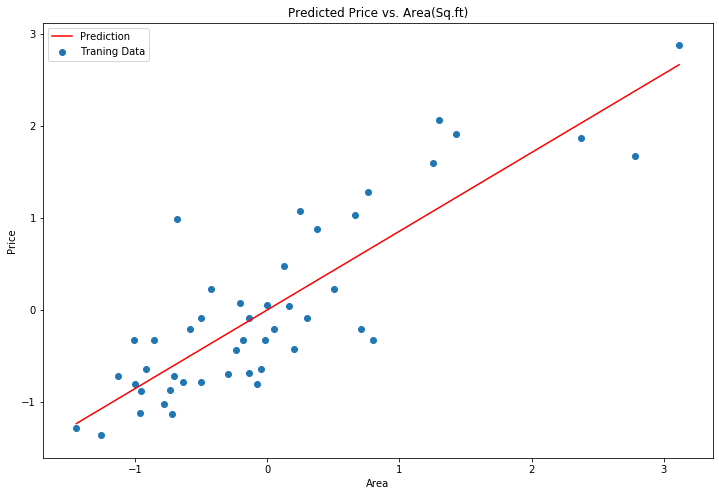

In [125]:
x = np.linspace(data.Area.min(), data.Area.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Area, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Area(Sq.ft)')

Text(0.5, 1.0, 'Error vs. Training Epoch')

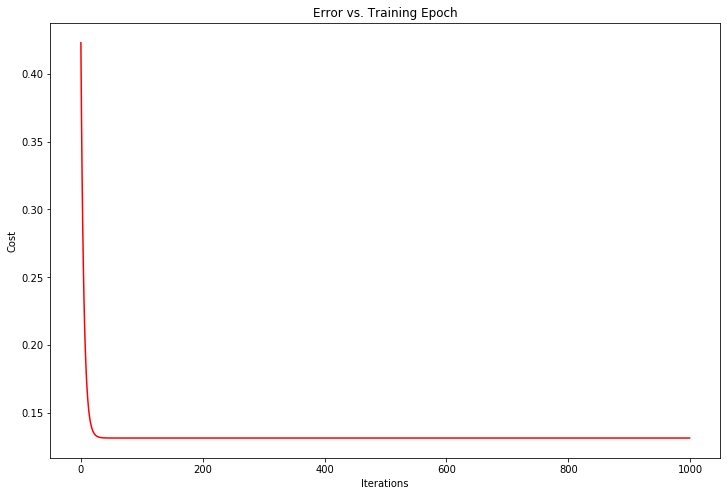

In [126]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Prediction for 2000 sqft house

In [137]:
pred_x = np.matrix([(2000-2000.680851)/794.702354])
res = g[0, 0] + (g[0, 1] * pred_x)
((res * 125039.899586) + 340412.659574)[0,0]

340321.06789738435

## Linear regression with multiple variables

In [128]:
path = 'data/ex1data2.csv'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features.  This is very easy with pandas.

In [129]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [130]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068648053904197

We can take a quick look at the training progess for this one as well.

Text(0.5, 1.0, 'Error vs. Training Epoch')

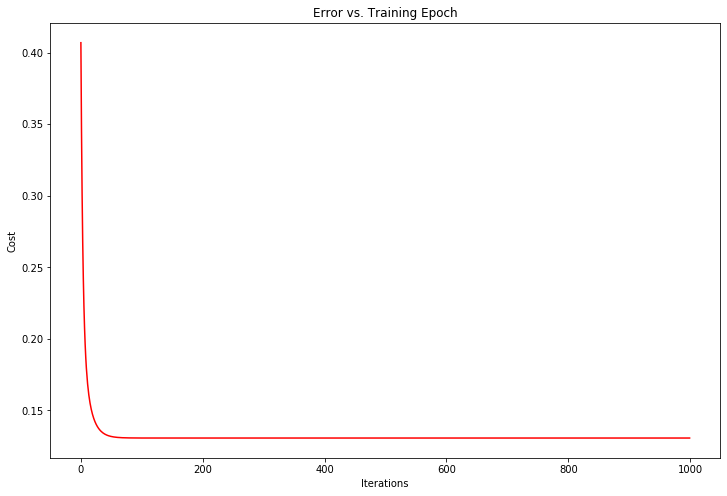

In [131]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [132]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here's what the scikit-learn model's predictions look like.

Text(0.5, 1.0, 'Predicted Price vs. Area')

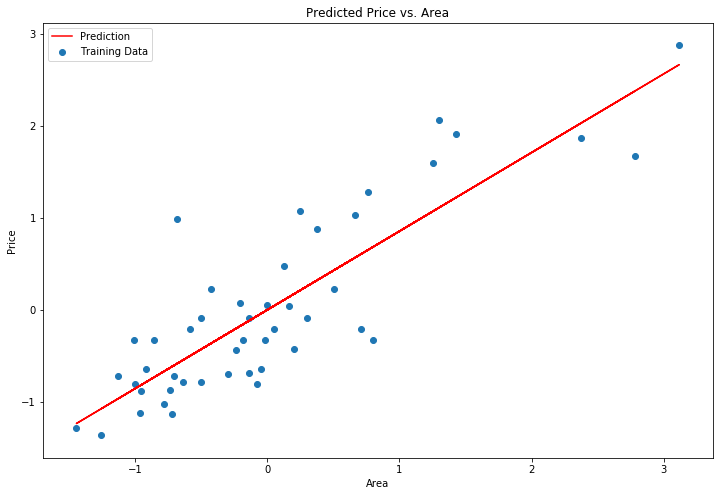

In [134]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Area, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Area')